# Лекции №5-6. Глубокое обучение.

Идея сверточных нейронных сетей (CNN) зародилась при необходимости подстраивания уже существовавших на тот момент каскадов Хаара под конкретную задачу, т.е. обучению весов сверток:
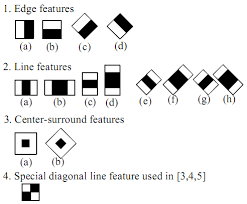

В случае сверточных нейронных сетей кол-во настраиваемых (обучаемых) элементов по сравнению с аналогичными полносвязными сетями на порядки меньше, что позволяет обучать сеть гораздо быстрее.  
Применение ядра свертки на изображение дает простые линейные комбинации, которые быстро вычисляются:
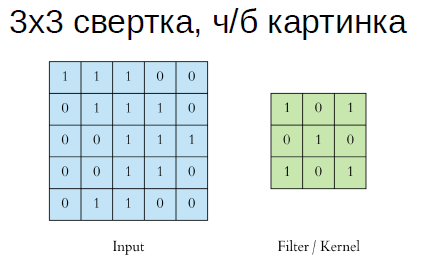

В случае с цветными изображениями входных канала 3 (RGB), поэтому и свертки будут глубиной 3:
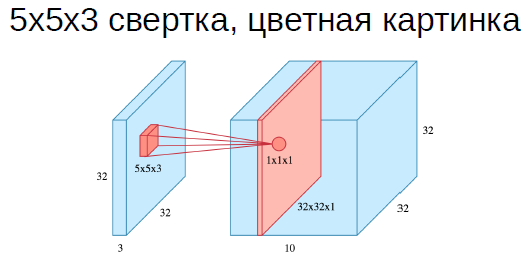

Увеличение глубины признаков до 10 свидетельствует о применении нескольких сверток к входному изображению.

### Padding

Обычная свертка без применения дополнительных инструментов уменьшает размер изображения во входном слое. Так например, свертка 3х3 уменьшает изображение на 1 пиксель с каждой стороны, 5х5 - на 2, и т.д.  
Если необходимо сохранять изначальный размер изображения от слоя к слою, дополнительным инструментом будет выступать *padding*.

**Padding** - расширение изначального изображения на такое кол-во пикселей с каждой стороны, на которое уменьшится изображение после применения свертки.  
Существует несколько видов расширения:  
* Заполнение 0 (т.е. черными пикселями);  
* Заполнение значениями крайних пикселей;  
* Заполнение симметрично относительно краев изображения;  
* Закольцовывание, т.е. заполнение крайними пикселями противоположной стороны.

### Stride

В классическом использовании мы применяем свертку на левый верхний край изображения, далее двигаем на 1 пиксель вправо, пока не дойдем до правого края изображения, а затем повторяем тоже самое слева направо, но уже на 1 пиксель ниже. Если мы хотим ускорить вычисления и заведомо уверены, что критично для задачи не потеряем в точности, то мы можем проделывать вышеописанную процедуру, сдвигая всегда не на 1 пиксель, а на несколько, используя инструмент *stride*.  
**Stride** - величина кол-ва пикселей, на которую сдвигают свертку после предыдущего применения.

### Pooling

Если необходимо уменьшить кол-во нейронов без значительного уменьшения точности, то производится процедура *pooling*.  
**Pooling** - повышение "контрасности" изображения: делим изображение на области и из каждой области берем только одно значение. Самый популярный вид - **max pooling** - когда берется наибольшее значение в области.  
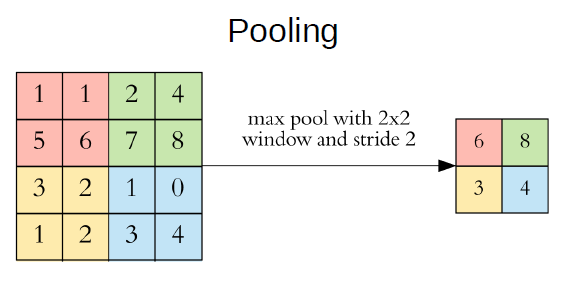

### Dropout

Чтобы уменьшить переобучение, а также исключить то, что соседние нейроны в среднем будут обучаться похоже между собой, т.е. по сути будет много весов, которые несут в себе одну и ту же информацию, придумали метод "исключения" нейронов, называемый *dropout*.

**Dropout** - метод регуляризации искусственных нейронных сетей, предназначен для уменьшения переобучения сети за счет предотвращения сложных коадаптаций отдельных нейронов на тренировочных данных во время обучения.  
Термин «dropout» (выбивание, выбрасывание) характеризует исключение определённого процента (например 30%) случайных нейронов (находящихся как в скрытых, так и видимых слоях) на разных итерациях (эпохах) во время обучения нейронной сети. Это очень эффективный способ усреднения моделей внутри нейронной сети. В результате более обученные нейроны получают в сети больший вес. Такой приём значительно увеличивает скорость обучения, качество обучения на тренировочных данных, а также повышает качество предсказаний модели на новых тестовых данных.  
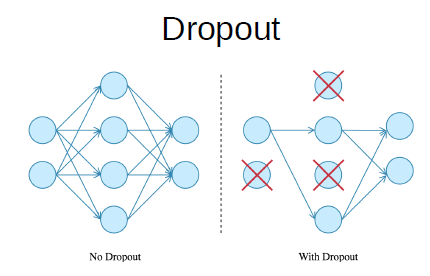

### Типичный вариант архитектуры сверточной нейронной сети

В итоге типичная сверточная нейронная сеть выглядит примерно так:
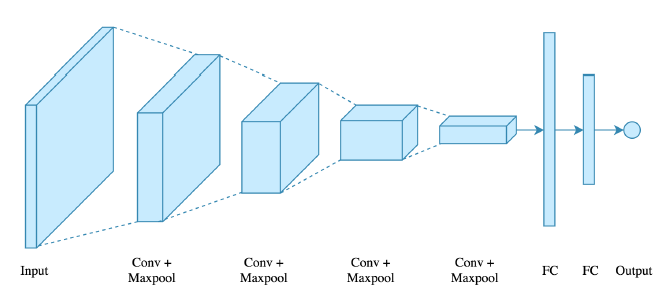

При необходимости использования многослойных сложных нейросетей часто прибегают к следующему методу: берется готовая обученная на схожей задаче сеть, и переобучаются не все слои, а только полносвязные (и иногда возможно последний сверточный). Это представляется возможным сделать на основании предположения: все сверточные слои ранее обученной сети выделяют обобщенные фичи с помощью каскадов Хаара, и эти фичи подходят для решения многих различных задач.

### Augmentation

**Augmentation** - прием искусственного увеличения обучающей выборки путем линейного преобразования (поворота, отражения) исходных изображений. Позволяет увеличить объем обучающей выборки и, если необходимо, "отвязать" нейронную сеть от координатной привязки искомого объекта к изображению.  
Однако применение данного приема не всегда оправдано, а иногда и вовсе неуместно (симметрично отражать номерные знаки автомобилей не имеет смысла).

### Regularization

**Регуляризация** - набор методов по применению дополнительных ограничений, вводимых на критерий качества.

Цели регуляризации:  
* Предотвратить чрезмерную подгонку (overfitting);  
* Включить в критерий качества штраф за сложность модели;  
* Обеспечить существование обратной матрицы $(X^T*X)^-$$^1$;  
* Не допустить большие значения коэффициентов модели

Для критерия качества суммы квадратов ошибок приведем примеры применения регуляризации:

*Примечание*: здесь и далее ```beta``` - настраиваемые коэффициенты модели (в случае нейросетей - веса).

* Ridge-регуляризация (L2-регуляризация):
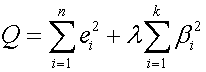

* Lasso-регуляризация (L1-регуляризация):
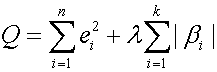

* Совмещение двух предыдущих вариантов - elastic net:
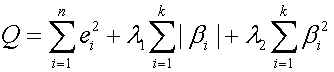

* В зависимости от номера коэффициента. Применимо, например, при поиске коэффициентов многочлена, где коэффициент при большей степени следует штрафовать сильнее:
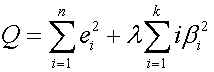

* Со степень при коэффициентах меньше 1:
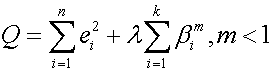

*Примечание*: свободные члены не должны включаться в ```beta```, т.к. их минимизация или штрафование сети за их рост является неэффективным и бессмысленным (они условно смещают уровень минимума критерия качества, но не влияют на точку минимума.

```lambda``` появилось из невозможности в чистом виде посчитать обратную матрицу для прямого решения задачи оптимизации и непосредственного нахождения всех ```beta```. Обычно это небольшое число, которое подбирается на валидационной (или тестовой) выборке.

### Пример №1.

В этом примере будет использоваться обычная FC-сеть, чтобы показать, что для простых случаев ее использование тоже возможно. Т.к. сеть классической архитектуры, то входное изображение надо привести к вектору-столбцу.

In [1]:
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from tensorflow.keras import utils

In [2]:
#  Задаем параметры сети
batch_size = 128
nr_classes = 10
nr_iterations = 20

In [3]:
#  Читаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
#  картинку вытягиваем в столбец
#  Информация о взаимном расположении теряется (не совсем)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

In [5]:
#  Уточняем тип данных
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

#  Нормируем входные значения
X_train /= 255
X_test /= 255

In [6]:
#  Делаем 10 бинарных столбцов (так как 10 цифр)
Y_train = utils.to_categorical(y_train, nr_classes)
Y_test = utils.to_categorical(y_test, nr_classes)

In [7]:
#  Описываем сеть. Один внутренний слой
model = Sequential()
model.add(Dense(196, input_shape=(784,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [8]:
#  Проверяем себя
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 196)               153860    
                                                                 
 activation (Activation)     (None, 196)               0         
                                                                 
 dropout (Dropout)           (None, 196)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1970      
                                                                 
 activation_1 (Activation)   (None, 10)                0         
                                                                 
Total params: 155,830
Trainable params: 155,830
Non-trainable params: 0
_________________________________________________________________


In [9]:
#  Определяем параметры обучения
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [10]:
np.random.seed(1337)  # для воспроизводимости сети

net_res_1 = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=nr_iterations,
                    verbose=1, validation_data=(X_test, Y_test))

Epoch 1/20
469/469 [==============================] - 3s 5ms/step - loss: 0.4349 - accuracy: 0.8717 - val_loss: 0.1916 - val_accuracy: 0.9449
Epoch 2/20
469/469 [==============================] - 2s 4ms/step - loss: 0.2206 - accuracy: 0.9360 - val_loss: 0.1418 - val_accuracy: 0.9589
Epoch 3/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1750 - accuracy: 0.9486 - val_loss: 0.1137 - val_accuracy: 0.9674
Epoch 4/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1492 - accuracy: 0.9556 - val_loss: 0.1010 - val_accuracy: 0.9694
Epoch 5/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1312 - accuracy: 0.9612 - val_loss: 0.0907 - val_accuracy: 0.9724
Epoch 6/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1178 - accuracy: 0.9647 - val_loss: 0.0854 - val_accuracy: 0.9745
Epoch 7/20
469/469 [==============================] - 2s 4ms/step - loss: 0.1091 - accuracy: 0.9668 - val_loss: 0.0801 - val_accuracy: 0.9747
Epoch 

In [11]:
score = model.evaluate(X_test, Y_test, verbose = 0)
print(score)

[0.06436672061681747, 0.9817000031471252]


### Пример №2.

Применим к датасету MNIST сверточные нейронные сети.

In [12]:
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras import utils
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import  metrics
import tensorflow.keras

In [13]:
# Читаем данные
train = pd.read_csv("train.csv")
#  test = pd.read_csv("test.csv")

In [14]:
# Разделяем предикторы и отклик
Y = train['label']
X = train.drop(['label'], axis=1)

In [15]:
# Разделяем на обучающую выборку и выборку валидации
x_train, x_val, y_train, y_val = train_test_split(X.values, Y.values, test_size=0.10, random_state=19)

In [16]:
# параметры сети, чтобы их было удобно менять
batch_size = 128
num_classes = 10
epochs = 5 

# размерность картинки
img_rows, img_cols = 28, 28

In [17]:
# преобразование обучающей выборки
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_train /= 255

# преобразование выборки валидации
x_val = x_val.reshape(x_val.shape[0], img_rows, img_cols, 1)
x_val = x_val.astype('float32')
x_val /= 255

In [18]:
input_shape = (img_rows, img_cols, 1)

# преобразование отклика в 10 бинарных перменных 
y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

In [19]:
model = Sequential()

# первый сверточный слой
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

# второй сверточный слой
model.add(Conv2D(64, (3, 3), activation='relu'))

# слой Pooling
model.add(MaxPooling2D(pool_size=(2, 2)))

# слой dropout
model.add(Dropout(0.25))

# растягиваем в вектор
model.add(Flatten())

# первый слой анализа 
model.add(Dense(128, activation='relu'))

# слой dropout
model.add(Dropout(0.5))

# второй слой анализа 
model.add(Dense(num_classes, activation='softmax'))

# определяемся с обучением
model.compile(loss=tensorflow.keras.losses.categorical_crossentropy,  optimizer=tensorflow.keras.optimizers.Adadelta(), metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout_1 (Dropout)         (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                      

In [20]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_val, y_val))
accuracy = model.evaluate(x_val, y_val, verbose=0)
print('Test accuracy:', accuracy[1])

Epoch 1/5
296/296 [==============================] - 74s 249ms/step - loss: 2.2928 - accuracy: 0.1427 - val_loss: 2.2715 - val_accuracy: 0.2514
Epoch 2/5
296/296 [==============================] - 79s 268ms/step - loss: 2.2606 - accuracy: 0.2056 - val_loss: 2.2352 - val_accuracy: 0.3431
Epoch 3/5
296/296 [==============================] - 81s 273ms/step - loss: 2.2245 - accuracy: 0.2829 - val_loss: 2.1934 - val_accuracy: 0.4769
Epoch 4/5
296/296 [==============================] - 77s 258ms/step - loss: 2.1831 - accuracy: 0.3516 - val_loss: 2.1435 - val_accuracy: 0.5707
Epoch 5/5
296/296 [==============================] - 67s 227ms/step - loss: 2.1317 - accuracy: 0.4106 - val_loss: 2.0826 - val_accuracy: 0.6271
Test accuracy: 0.6271428465843201
